In [36]:
#USING DECISIONTREEREGRESSOR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
sns.set()
plt.style.use('seaborn-whitegrid')
from sklearn.metrics import accuracy_score

data = pd.read_csv("INR.csv")
print(data.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2022-05-02  76.523102  76.597801  76.348000  76.523102  76.523102       0
1  2022-05-03  76.524101  76.817497  76.453003  76.524101  76.524101       0
2  2022-05-04  76.467300  76.567497  76.167999  76.467300  76.467300       0
3  2022-05-05  76.001602  76.572601  75.994003  76.001602  76.001602       0
4  2022-05-06  76.541801  77.069298  76.466499  76.541801  76.541801       0


/var/folders/7c/6s1bqhdn4cz48cjhf_km97sc0000gn/T/ipykernel_34634/2041381719.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


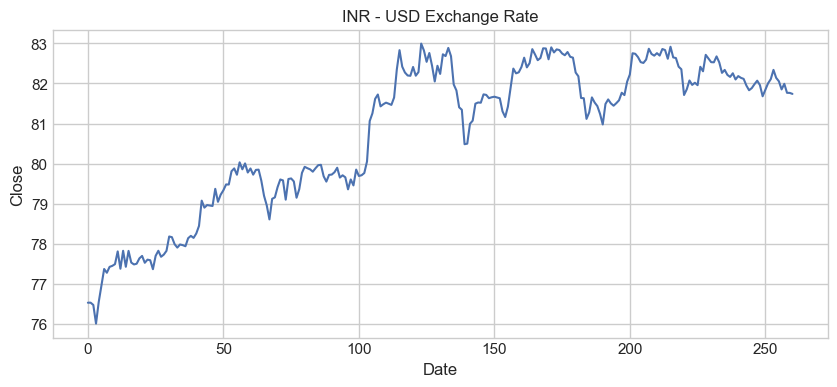

In [37]:
plt.figure(figsize=(10, 4))
plt.title("INR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.995402  0.995898  1.000000   1.000000     NaN
High       0.995402  1.000000  0.993264  0.995403   0.995403     NaN
Low        0.995898  0.993264  1.000000  0.995896   0.995896     NaN
Close      1.000000  0.995403  0.995896  1.000000   1.000000     NaN
Adj Close  1.000000  0.995403  0.995896  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


/var/folders/7c/6s1bqhdn4cz48cjhf_km97sc0000gn/T/ipykernel_34634/1425240320.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())
/var/folders/7c/6s1bqhdn4cz48cjhf_km97sc0000gn/T/ipykernel_34634/1425240320.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


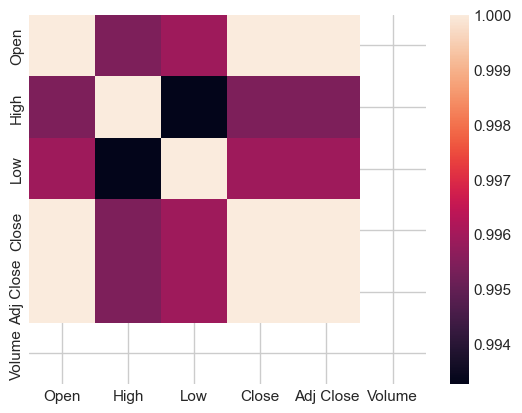

In [38]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [39]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [40]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [41]:
data = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
data


,Predicted Rate
0,78.160599
1,81.524902
2,82.581902
3,79.118301
4,82.265297
5,82.140900
6,81.071404
7,80.991997
8,77.418404
9,81.650299


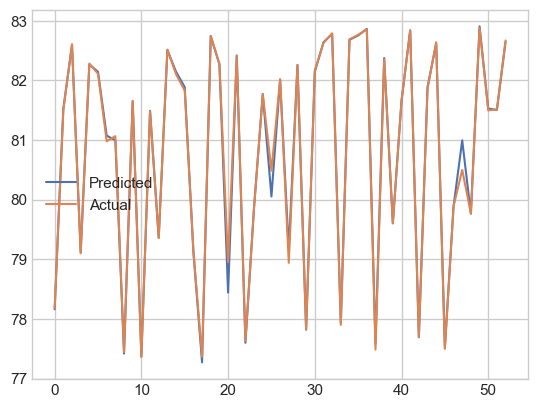

Accuracy: 0.9433962264150944


In [42]:

plt.plot(ypred, label='Predicted')
plt.plot(ytest, label='Actual')

plt.legend()
plt.show()


accuracy = accuracy_score(ytest.astype(int), ypred.astype(int))

print("Accuracy:", accuracy)

    

In [44]:
#Using XGBOOST
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

df = pd.read_csv('INR.csv', parse_dates=['Date'])
df = df.set_index('Date')


df['Change'] = df['Close'].pct_change()


df.dropna(inplace=True)


y = df['Close']
X = df.drop(['Close'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


model = xgb.XGBRegressor()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R-squared:', r2)


accuracya = accuracy_score(y_test.astype(int), y_pred.astype(int))

print("Accuracy:", accuracya)

MSE: 0.004002999670312943
R-squared: 0.9987849083453161
Accuracy: 0.9423076923076923
